### Aisya Mufidah Najwa / 1206230026 / DS-03-01

## 1. Pemahaman Masalah (Problem Understanding)

Pertanyaan Kunci: Bagaimana kita dapat mengelompokkan pelanggan berdasarkan karakteristik dasar mereka dan menemukan target pelanggan yang mudah dipengaruhi?
Tujuan Utama: Mengelompokkan pelanggan dengan algoritma klastering dan mengidentifikasi target pelanggan yang paling potensial untuk strategi pemasaran.

## 2. Pengumpulan Data (Data Collection)

Dataset ini telah disediakan dalam file CSV dan berisi informasi dasar pelanggan, termasuk ID pelanggan, usia, jenis kelamin, pendapatan tahunan, dan skor belanja.

Impor library yang diperlukan

In [387]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [388]:
df=pd.read_csv('dataset/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## 3. Eksplorasi Data (Data Exploration)

Memeriksa distribusi variabel (pendapatan tahunan dan skor belanja).
Menghitung statistik deskriptif (mean, median, standar deviasi) untuk memahami karakteristik demografis dan perilaku pelanggan.
Visualisasi hubungan antar variabel menggunakan scatter plot dan histogram untuk melihat pola dan keterkaitan.

mengetahui apa aja yg numerik dan non-numerik:

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [390]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


memeriksa distribusi variabel:

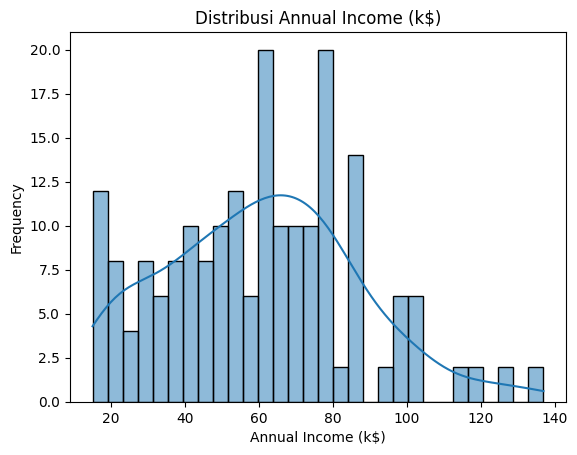

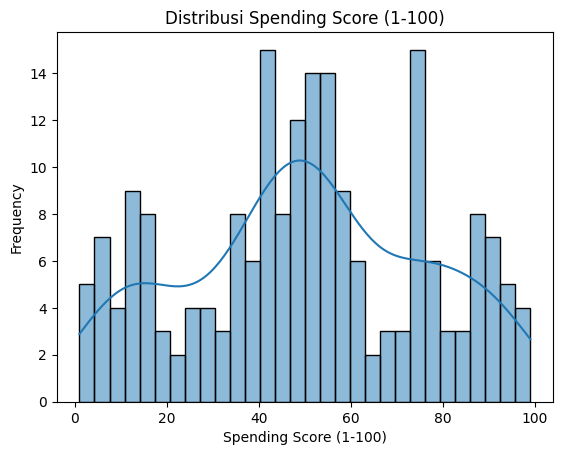

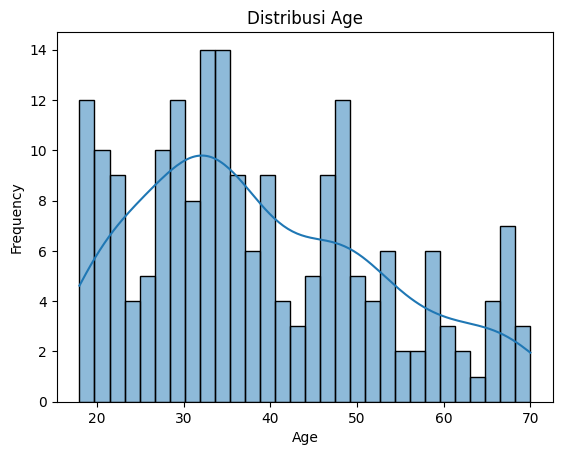

In [ ]:
columns = ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']

for col in columns:
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [392]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


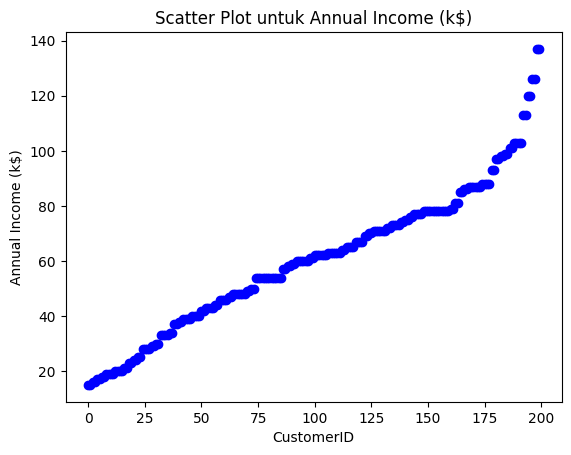

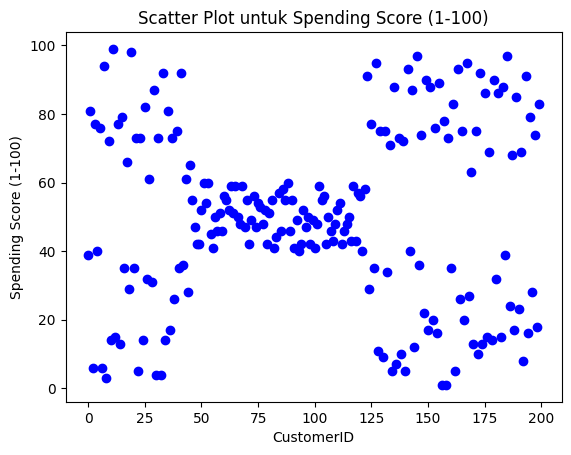

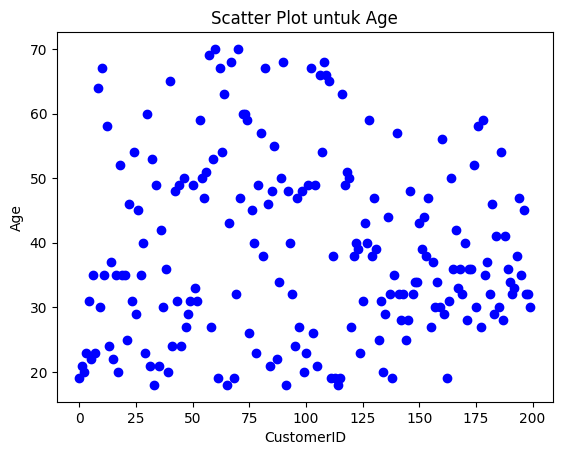

In [393]:
for col in columns:
    plt.scatter(range(len(df)), df[col], color='blue')
    plt.title(f'Scatter Plot untuk {col}')  # Tambahkan nama kolom sebagai judul
    plt.xlabel('CustomerID')
    plt.ylabel(col)  # Ubah label y agar sesuai dengan kolom
    plt.show()

Visualisasi hubungan antar variabel:

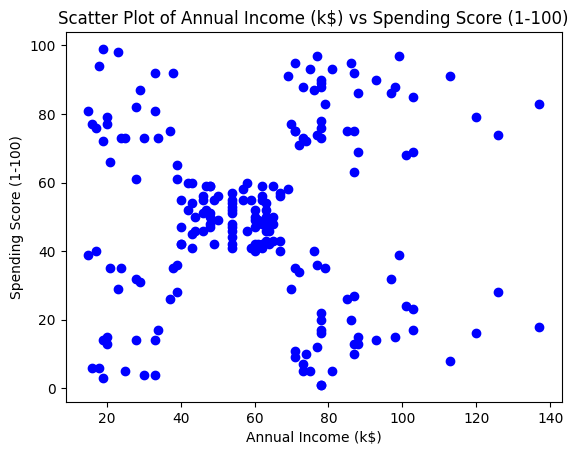

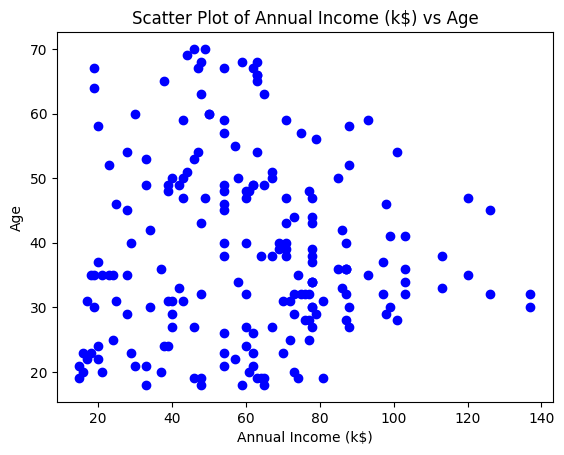

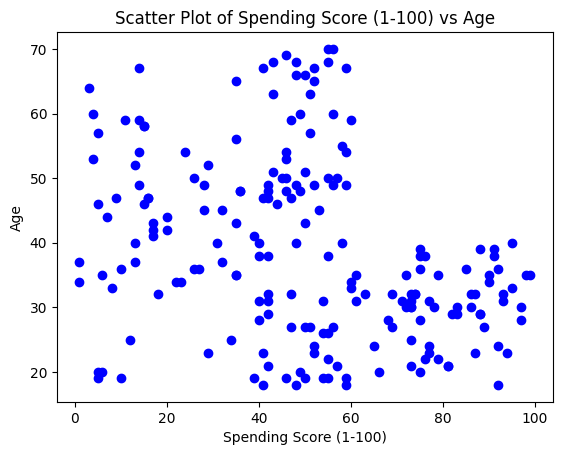

In [394]:
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        plt.scatter(df[columns[i]], df[columns[j]], color='blue')
        plt.title(f'Scatter Plot of {columns[i]} vs {columns[j]}')
        plt.xlabel(columns[i])
        plt.ylabel(columns[j])
        plt.show()

## 4. Persiapan Data (Data Preparation)

Memeriksa apakah ada data hilang (missing values) atau outlier.
Melakukan normalisasi atau standarisasi data jika diperlukan.
Mengelola encoding untuk variabel kategori seperti jenis kelamin agar dapat diolah oleh model klastering.


cek distribusi normal:

C:\Users\najwa\AppData\Local\Temp\ipykernel_26760\1047817239.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


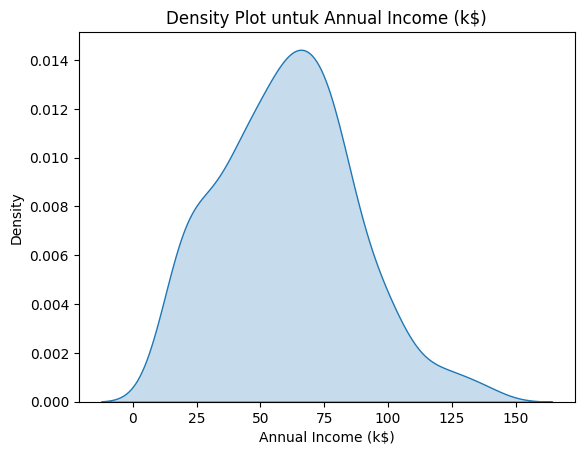

C:\Users\najwa\AppData\Local\Temp\ipykernel_26760\1047817239.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


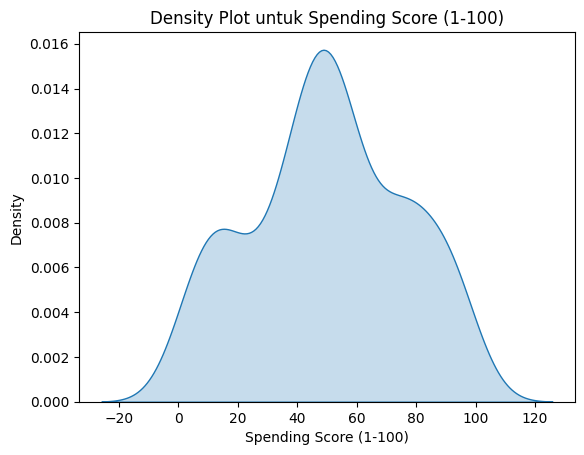

C:\Users\najwa\AppData\Local\Temp\ipykernel_26760\1047817239.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


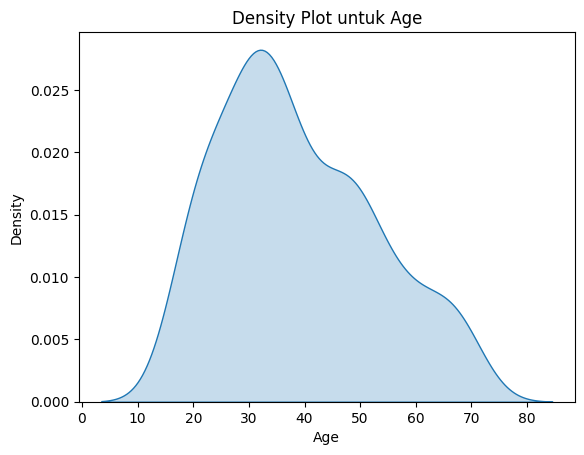

In [395]:
for col in columns:
    sns.kdeplot(df[col], shade=True)
    plt.title(f'Density Plot untuk {col}')
    plt.show()

Tidak normal tpi kata teman saya gausah di normalisasi/standarisasi gpp (kata kakaknya katanya)

In [396]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

tidak ada missing value

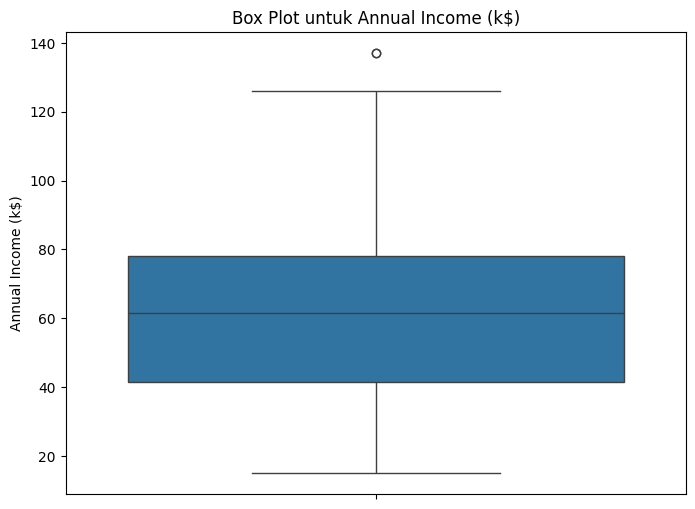

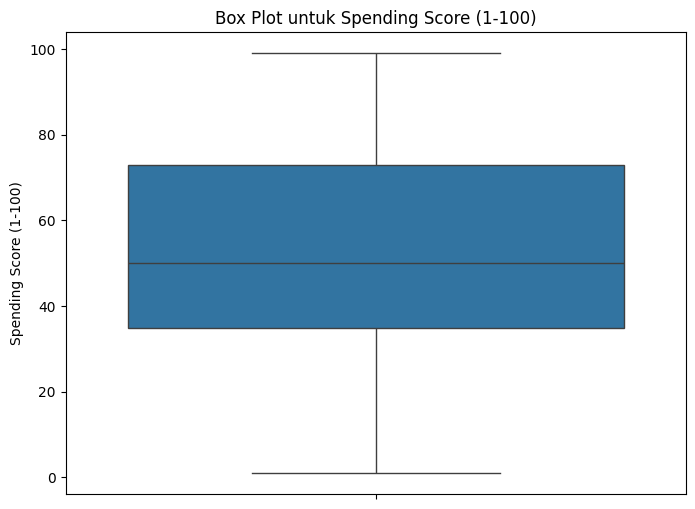

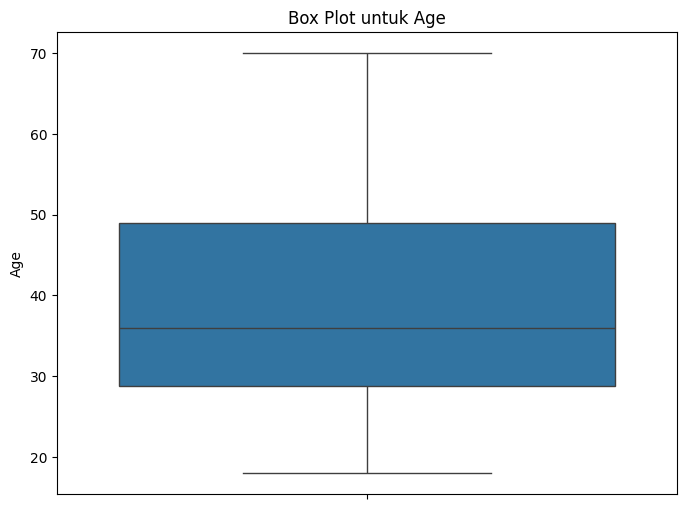

In [397]:
for col in columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[col])
    plt.title(f'Box Plot untuk {col}')
    plt.show()

outliernya 1 doang

encoding gender:

In [398]:
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df_encoded

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False
...,...,...,...,...,...
195,196,35,120,79,False
196,197,45,126,28,False
197,198,32,126,74,True
198,199,32,137,18,True


## 5. Pemodelan (Modeling)

Menggunakan K-Means untuk melakukan klastering awal, menyesuaikan jumlah klaster (k) untuk memperoleh hasil yang optimal.
Menggunakan DBSCAN untuk klastering berbasis kepadatan yang lebih adaptif terhadap pola-pola yang tidak teratur.
Menerapkan kedua model dan membandingkan hasil klaster untuk memahami perbedaan hasil yang dihasilkan oleh masing-masing metode.

Saya coba pakai Annual Income (k$) sama Spending Score (1-100) (soalnya di scatter kyknya menarik), sama Gender 

### K-Means

Labels: [0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
Centroid: [[55.66013072 39.94771242  0.4379085 ]
 [76.5106383  83.57446809  0.44680851]]


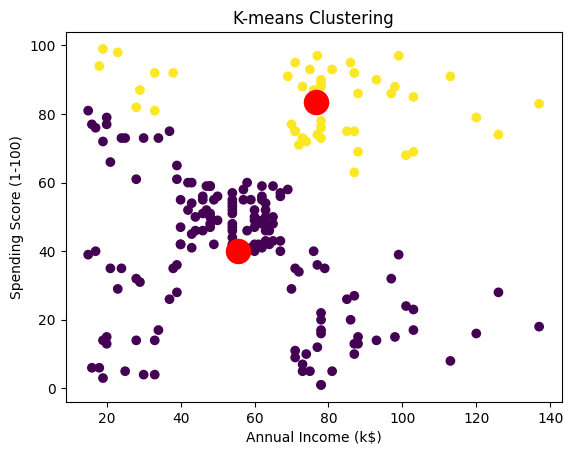

In [ ]:
# Memisahkan CustomerID dan fitur lainnya
customer_ids = df_encoded['CustomerID']
features = df_encoded.drop(['CustomerID', 'Age'], axis=1)

X = features.to_numpy()  # Mengonversi data ke array NumPy :D

# Membuat model K-means
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

# Hasil klasterisasi
print("Labels:", kmeans.labels_)
print("Centroid:", kmeans.cluster_centers_)

# Visualisasi
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title("K-means Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

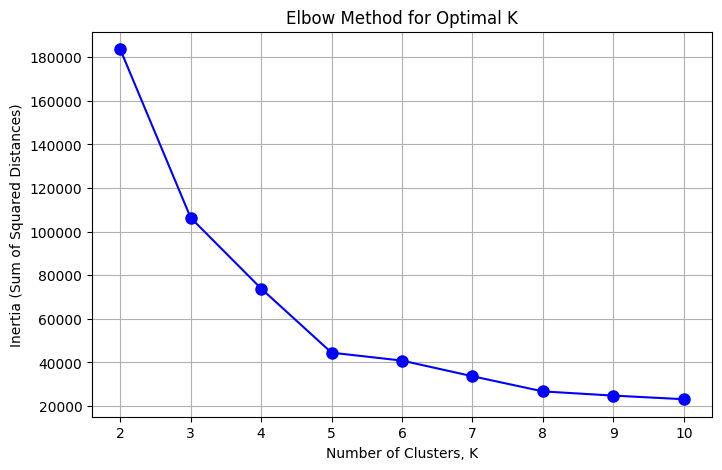

In [400]:
# Menentukan jumlah klaster optimal menggunakan Elbow Method
inertias = []
K_values = range(2, 11)  # Nilai K dari 2 hingga 10

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# 6. Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_values, inertias, 'bo-', markersize=8)
plt.xlabel('Number of Clusters, K')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

antara 3 atau 5 klaster menurut Elbow Method

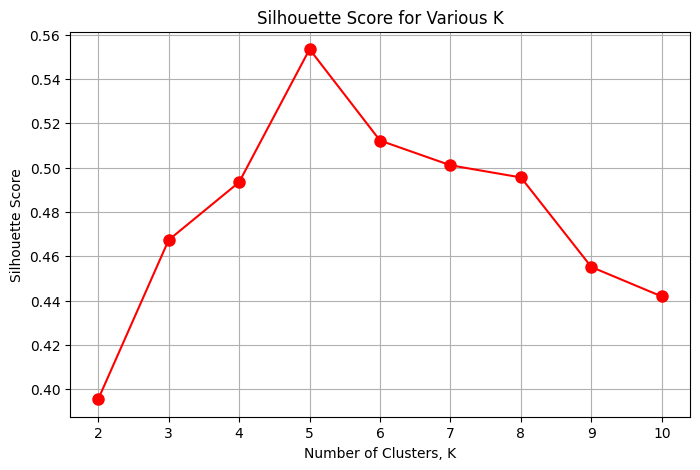

0.39545585408755346
0.46733000902034116
0.4934199104920511
0.5534496268497305
0.5122320574513162
0.5010537947330135
0.4955673870982722
0.45513536610887323
0.44183900866842035


In [401]:
# Step 3: Mengevaluasi hasil klasterisasi menggunakan Silhouette Score
silhouette_scores = []

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K_values, silhouette_scores, 'ro-', markersize=8)
plt.xlabel('Number of Clusters, K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Various K')
plt.grid(True)
plt.show()

for i in silhouette_scores:
  print(i)

5 klsster adalah yg paling optimal menurut Silhouette Score

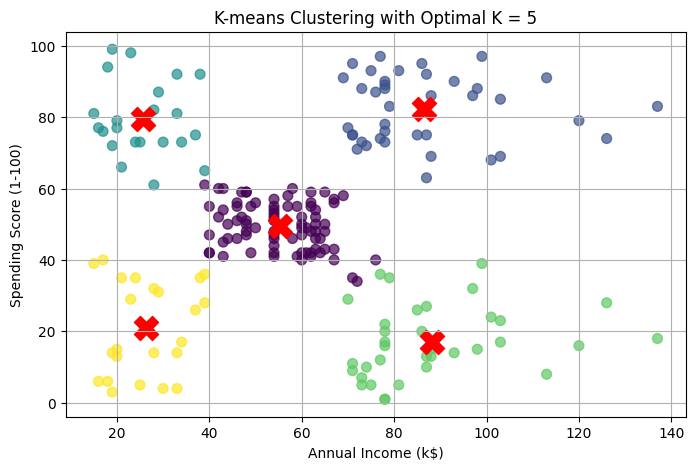

In [402]:
# Step 4: Melakukan klasterisasi dengan K optimal
kmeans_optimal = KMeans(n_clusters=5, random_state=42)
labels_optimal = kmeans_optimal.fit_predict(X)

# Visualisasi hasil klasterisasi
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels_optimal, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title(f"K-means Clustering with Optimal K = {5}")
plt.grid(True)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

Ini visualisasi nya hanya menggunakan Annual Income sama Spending score. 

ternyata sangat menarik, meski tidak memiliki hubungan linear, bisa dilihat pada rentang pendapatan tahunan sekitar 1-40k dolar ada 2 klaster, artinya orang orang dengan pendapatan tahunan rendah terbagi menjadi dua klaster: yang memiliki spending score sekitar 1-40 (frekuensi pembelian rendah) dan yang memiliki spending score kira-kira 60-100 (frekuensi pembelian tinggi), tidak ada klaster dengan spending score menengah untuk pendapatan tahunan 1-40k dolar.

Konsumen dengan pendapatan tahunan menengah sekitar 40-70k dolar hanya memiliki 1 klaster: klaster dengan spending skor menengah sekitar 40-60.

Sedangkan konsumen yang memiliki pendapatan tahunan sekitar 70-140k dolar juga dibagi menjadi 2 klaster: yang memiliki spending score sekitar 1-40 (frekuensi pembelian rendah) dan yang memiliki spending score kira-kira 60-100 (frekuensi pembelian tinggi), tidak ada klaster dengan spending score menengah untuk pendapatan tahunan 70-140k dolar.

keren

### DBScan

Saya menggunakan perulangan untuk menemukan eps dan MinPts yang paling optimal untuk DBScan berdasarkan Silhouette Score dan Davies-Bouldin Index, karena saya bingung, tp terbatas pada rentang 1-20 dengan lebih dari 2 kluster (karena satunya mungkin noise).

In [403]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Rentang nilai untuk eps dan min_samples
eps_values = np.arange(1, 21, 1)  # eps dari 1 sampai 20
min_samples_values = np.arange(2, 21, 1)  # min_samples dari 2 sampai 20

best_eps = None
best_min_samples = None
best_silhouette = -1  # Silhouette score bisa negatif, jadi mulai dari yang terendah
best_db_index = np.inf  # Davies-Bouldin index seharusnya rendah, jadi mulai dari yang tertinggi

# Loop untuk mencari parameter terbaik
for eps in eps_values:
    for min_samples in min_samples_values:
        # Klastering dengan DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X)

        # Hitung metrik evaluasi jika ada kluster yang terbentuk
        if len(set(dbscan_labels)) > 2:  # yang lebih dari dua kluster
            silhouette = silhouette_score(X, dbscan_labels)
            db_index = davies_bouldin_score(X, dbscan_labels)

            # Cek jika ini adalah parameter terbaik
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_eps = eps
                best_min_samples = min_samples
            
            if db_index < best_db_index:
                best_db_index = db_index
                best_eps_db = eps
                best_min_samples_db = min_samples

print("\nBest parameters based on Silhouette Score:")
print(f"eps: {best_eps}, min_samples: {best_min_samples}, Silhouette Score: {best_silhouette}")

print("\nBest parameters based on Davies-Bouldin Index:")
print(f"eps: {best_eps_db}, min_samples: {best_min_samples_db}, Davies-Bouldin Index: {best_db_index}")


Best parameters based on Silhouette Score:
eps: 9, min_samples: 3, Silhouette Score: 0.4744537943662793

Best parameters based on Davies-Bouldin Index:
eps: 9, min_samples: 3, Davies-Bouldin Index: 0.7219152357300334


akhirnya saya pakai eps 9 dan minpts 3 :D

Labels: [ 0  1  2  1  0  1  2  3  2  1  2  3  2  1  2  1  0  1  0  3  0  1  2  1
  2  1  0  1  0  1  2  1  2  1  2  1  2  1  4  1  4  1  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  4  5  4  5  6  5  6  5  4  5  6  5  6  5  6  5  6  5  4  5
  6  5  4  5  6  5  6  5  6  5  6  5  6  5  6  5  4  5  6  5  6  5  6  5
  6  5  6  5  6  5  6  5  6  5  6  5  6  5  6  5  6 -1  6 -1  6  5  6 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


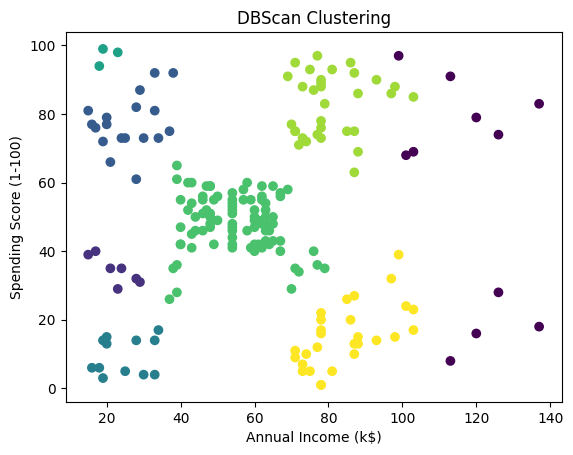

In [404]:
# Membuat model DBScan
dbscan = DBSCAN(eps=9, min_samples=3)
dbscan.fit(X)

# Hasil klasterisasi
print("Labels:", dbscan.labels_)

# Visualisasi
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='viridis')
plt.title("DBScan Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [407]:
len(set(dbscan_labels))

8

Ada 7 klaster dengan beberapa noise (yang labelnya -1), Bedanya, konsumen dengan pendapatan tahunan rendah dibagi lagi menjadi 4 kluster.

## 6. Evaluasi Model (Model Evaluation)

Mengukur kualitas klastering menggunakan metrik evaluasi seperti Silhouette Score dan Davies-Bouldin Index untuk menilai kepaduan dan pemisahan antar klaster.
Menginterpretasikan hasil klaster untuk mengidentifikasi segmen pelanggan potensial sebagai target pemasaran.

In [408]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score

# K-means
kmeans = KMeans(n_clusters=5)
kmeans_labels = kmeans.fit_predict(X)

# DBScan
dbscan = DBSCAN(eps=9, min_samples=3)
dbscan_labels = dbscan.fit_predict(X)

# Metrik Evaluasi K-means
print("K-means Silhouette Score:", silhouette_score(X, kmeans_labels))
print("K-means Davies-Bouldin Index:", davies_bouldin_score(X, kmeans_labels))

# Metrik Evaluasi DBScan
print("DBScan Silhouette Score:", silhouette_score(X, dbscan_labels))
print("DBScan Davies-Bouldin Index:", davies_bouldin_score(X, dbscan_labels))

K-means Silhouette Score: 0.5534496268497305
K-means Davies-Bouldin Index: 0.5731853446935513
DBScan Silhouette Score: 0.4744537943662793
DBScan Davies-Bouldin Index: 0.7219152357300334


## **Kesimpulan**

K-means:
* Silhouette Score: 0.553 
    - kluster cukup terpisah dan terdefinisi dengan baik. Nilai diatas nol dan mendekati 1 menunjukkan kluster yang baik.
* Davies-Bouldin Index: 0.573 
    - nilai lebih rendah menunjukkan pemisahan kluster yang lebih baik. Kluster relatif baik dalam hal kepadatan dan jarak antar kluster.

DBScan:
* Silhouette Score: 0.474 
    - lebih rendah dibandingkan dengan K-means, kluster mungkin tidak sebaik K-means dalam dataset ini.
* Davies-Bouldin Index: 0.722 
    - lebih tinggi dibandingkan dengan K-means, yang menunjukkan pemisahan kluster yang lebih buruk.

Artinya, K-means menunjukkan performa yang lebih baik dibandingkan dengan DBScan berdasarkan kedua metrik evaluasi yang digunakan. Tapi klasterisasi juga tergantung pada karakteristik data. DBScan mungkin lebih baik untuk dataset dengan bentuk kluster yang tidak beraturan atau jika ada banyak noise dalam data. Berhubung K-means menunjukkan hasil evaluasi kluster lebih baik, saya akan menginterpretasi dengan kluster dr k-means.

## **Interpretasi:**

K-means terbagi ke dalam 5 klaster. Seperti yang sudah saya tulis diatas, dua klaster untuk pendapatan tahunan rendah, satu klaster untuk menengah, dan dua klaster untuk yang tinggi. (dalam dolar)

#### 1. Pendapatan Tahunan Rendah (1-40k):

Terbagi menjadi dua klaster:
* Kluster 1: Dengan Spending Score 1-40 (frekuensi pembelian rendah).
>Kelompok ini menunjukkan frekuensi pembelian yang rendah. Mereka mungkin sangat selektif dalam belanja atau mungkin tidak memiliki cukup anggaran.
* Kluster 2: Dengan Spending Score 60-100 (frekuensi pembelian tinggi).
>Menarik bahwa meskipun memiliki pendapatan rendah, konsumen dalam kelompok ini menunjukkan frekuensi pembelian yang tinggi. Bisa mengindikasikan perilaku boros, memprioritaskan pengeluaran pada barang-barang tertentu, atau mungkin mereka menghabiskan lebih dari anggaran mereka untuk kebutuhan atau keinginan yang dianggap penting. Mungkin juga mereka memang kerja dari situ (kulaan).

#### 2. Pendapatan Menengah (40-70k):

* Kluster 3: Hanya memiliki satu kluster dengan Spending Score 40-60.
>kategori ini mungkin sensitif terhadap harga atau tidak memiliki preferensi kuat untuk berbelanja.

Konsumen dengan pendapatan menengah cenderung lebih realistis dalam pengeluaran mereka.

#### 3. Pendapatan Tinggi (70-140k):

Juga terbagi menjadi dua kluster:
* Kluster 4: Spending Score 1-40 (frekuensi pembelian rendah).
>Pelanggan kaya dengan frekuensi pembelian rendah mungkin menyukai produk dengan kualitas tinggi atau mungkin tidak berbelanja secara rutin dan selektif. Mereka mungkin lebih memilih untuk menabung atau menginvestasikan pendapatan mereka daripada mengeluarkannya.
* Kluster 5: Spending Score 60-100 (frekuensi pembelian tinggi).
>Konsumen dalam kategori ini mungkin memiliki pola pengeluaran yang lebih boros dan cenderung mengeluarkan uang untuk barang dan layanan premium.

## **Wawasan Strategi Pemasaran**

#### Kluster 1: Pendapatan Rendah, Spending Score Rendah (1-40)
- **Karakteristik**: Konsumen dalam kluster ini cenderung mengeluarkan uang dengan sangat hati-hati. Mereka mungkin lebih berfokus pada kebutuhan dasar.
- **Strategi Pemasaran**:
  - Tawarkan diskon atau penawaran khusus untuk produk kebutuhan sehari-hari.
  - Promosikan program loyalitas untuk meningkatkan frekuensi pembelian.
  - Edukasi konsumen tentang manfaat produk dan cara menghemat melalui pembelian yang lebih bijak.

#### Kluster 2: Pendapatan Rendah, Spending Score Tinggi (60-100)
- **Karakteristik**: Meskipun memiliki pendapatan rendah, konsumen ini bersedia mengeluarkan uang untuk barang tertentu. Mereka mungkin memiliki preferensi kuat terhadap merek tertentu.
- **Strategi Pemasaran**:
  - Tawarkan produk premium dengan harga terjangkau yang memberikan nilai lebih.
  - Fokus pada branding yang kuat dan pemasaran berbasis emosi untuk menarik perhatian mereka.
  - Berikan penawaran bundling atau diskon untuk produk yang sering mereka beli.

#### Kluster 3: Pendapatan Menengah, Spending Score Menengah (40-60)
- **Karakteristik**: Konsumen dalam kluster ini menunjukkan perilaku pembelian yang seimbang dan realistis.
- **Strategi Pemasaran**:
  - Tawarkan produk yang sesuai dengan gaya hidup mereka, misalnya barang-barang praktis dengan kualitas baik.
  - Adakan kampanye pemasaran yang menyoroti kualitas produk dan manfaat fungsionalnya.
  - Ciptakan konten yang mendidik dan memberikan wawasan terkait produk yang mereka minati.

#### Kluster 4: Pendapatan Tinggi, Spending Score Rendah (1-40)
- **Karakteristik**: Konsumen ini cenderung hemat dan selektif dalam pengeluaran meskipun memiliki pendapatan tinggi.
- **Strategi Pemasaran**:
  - Fokus pada produk dengan nilai investasi jangka panjang dan kualitas tinggi.
  - Buat kampanye yang menunjukkan efisiensi biaya dan keunggulan produk dalam jangka panjang.
  - Tawarkan pengalaman belanja yang personal dan eksklusif untuk menarik perhatian mereka.

#### Kluster 5: Pendapatan Tinggi, Spending Score Tinggi (60-100)
- **Karakteristik**: Konsumen ini cenderung mengeluarkan uang untuk barang dan layanan premium, menunjukkan gaya hidup yang lebih mewah.
- **Strategi Pemasaran**:
  - Tawarkan produk mewah dengan kualitas terbaik dan layanan pelanggan yang sangat baik.
  - Ciptakan pengalaman berbelanja yang eksklusif, seperti acara pribadi atau preview produk baru.
  - Fokus pada pemasaran yang menekankan status dan prestise yang datang dengan produk tersebut.


# *Terima kasih*